<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/08_k_nearest_neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

In [0]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:,:10]
y = breast_cancer.target

columns = ['radius','texture','Circumference','area','smoothness','compactness','dent','number_of_dent','Symmetry','fractal dimension']

df = DataFrame(data=X[:,:10],columns=columns)
df['objective_values']=y

In [0]:
X = df[['area','dent']].values
y = df['objective_values'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

In [13]:
# StandardScalerのインスタンスを作成する
sc=StandardScaler()

# 訓練データの平均と標準偏差を計算する
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 訓練データの標準化
X_train_std = sc.transform(X_train)

# テストデータの標準化
# テストデータは訓練データの平均と標準偏差を用いて変換する
X_test_std = sc.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=16,p=2,metric='minkowski')

In [17]:
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [18]:
# テストデータの予測
pred = knn.predict(X_test_std)
# 予測の確認
print(pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [0]:
# 確率(パーセプトロンでは取得できない)
proba = knn.predict_proba(X_test_std)

In [20]:
proba[0]

array([0.0625, 0.9375])

In [0]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,pred)

0.9298245614035088

In [0]:
import numpy
from matplotlib import pyplot
from mlxtend.plotting import plot_decision_regions

In [0]:
# すべてのデータをプロットすると多すぎるので制限する
N = 1000

# 訓練データとテストデータからN個ずつのサンプルを先頭から取ってくる
sampled_X = numpy.vstack((X_train_std[:N],X_test_std[:N]))
sampled_y = numpy.hstack((y_train[:N],y_test[:N]))

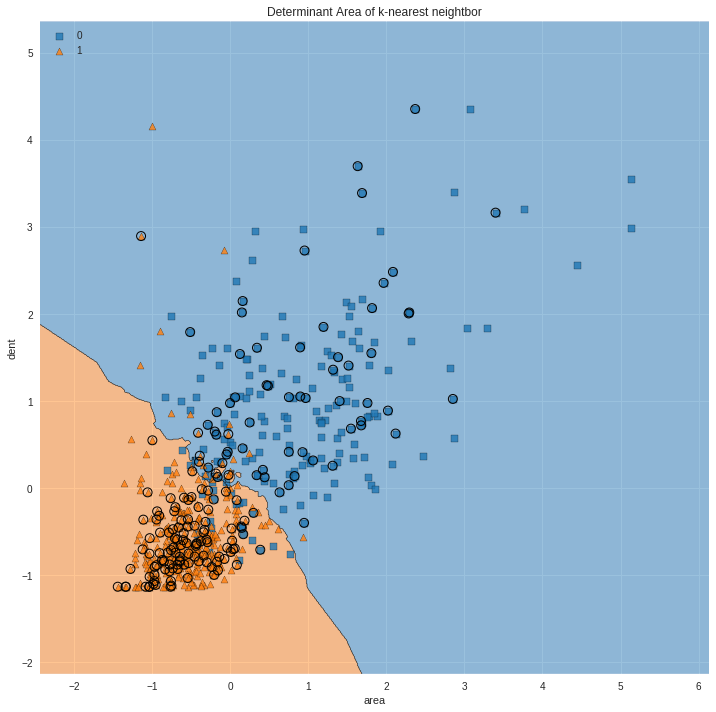

In [28]:
pyplot.figure(figsize=(12,12))
pyplot.xlabel("area")
pyplot.ylabel("dent")
pyplot.title("Determinant Area of k-nearest neightbor")

# 決定領域のプロット
plot_decision_regions(sampled_X,sampled_y,clf=knn,legend=2,X_highlight=X_test_std[:N])